In [3]:
import scipy as sp
import numpy as np
import pandas as pd
import sklearn
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta, datetime

pd.options.display.max_rows = 4000


In [12]:
# Pulling data from ANRGUSC github

df = pd.read_csv('https://raw.githubusercontent.com/ANRGUSC/covid19_risk_estimation/master/data/Covid-19-R.csv')

In [5]:
# Dropping Any Data with no Risk Score

df=df[df['Risk-Score']!=-1]

In [14]:
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])  


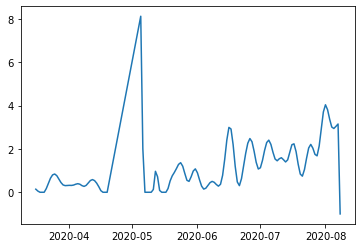

In [15]:
carson_data=df[df['Region']=='Arcadia']
carson_data=carson_data.sort_values('Time Stamp')
plt.plot(carson_data['Time Stamp'],carson_data['Risk-Score'])

In [690]:
# Converting String into Datetime data type
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])  


# renaming the first column to index

df=df.rename(columns={"Unnamed: 0": "index"})



In [691]:
# We only need to consider past 30 days of data. We won't consider any data prior to that.

# recent_date = max(df['Time Stamp'])
# recent_date = pd.to_datetime(recent_date)
# start_date = recent_date - timedelta(days = 30)
# mask = (df['Time Stamp'] > start_date) & (df['Time Stamp'] <= recent_date)
# df_recent = df.loc[mask]

df=df.sort_values('Time Stamp')

In [692]:
# df_region=df[df['Region']=='La Mirada']

# df_region[df_region['Time Stamp']=='2020-04-30']['Risk-Score']

# df_new=pd.DataFrame()

# df_new.info()

In [693]:
# dates=df['Time Stamp'].unique()
# regions=df['Region'].unique()

# risk_change=pd.DataFrame()

# for region in regions:
#     df_region = df[df['Region'] == region]
#     for date in dates:
#         df_region_date = df_region[df_region['Time Stamp'] == date]
#         three_days_bef = pd.to_datetime(date)-datetime.timedelta(days=3)
#         current_rs = df_region_date['Risk-Score']
#         three_bef_rs = df_region[df_region['Time Stamp'] == three_days_bef]['Risk-Score']
#         three_diff = current_rs - three_bef_rs
#         print(three_diff)
# #         print(df_region_date)
#         risk_change['Date']=date
#     break
        

In [694]:
# # dt.datetime.strptime(date,'%Y-%m-%d')
# pd.to_datetime(dates[0]) - datetime.timedelta(days=3)


In [695]:
# three_day_risk=[]

# for index,row in df.iterrows():
#     three_days_bef = row['Time Stamp']-dt.timedelta(days=3)
#     region=row['Region']
#     df_region=df[df['Region']==region]
#     risk_three_days = df_region[df_region['Time Stamp']==three_days_bef]['Risk-Score']
#     three_day_risk.append(risk_three_days)
#     print(risk_three_days)
#     break

df_recent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7132 entries, 24120 to 32751
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       7132 non-null   int64         
 1   Time Stamp  7132 non-null   datetime64[ns]
 2   Region      7132 non-null   object        
 3   Latitude    7132 non-null   float64       
 4   Longitude   7132 non-null   float64       
 5   Risk-Score  7132 non-null   float64       
 6   Risk-Level  7132 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 445.8+ KB


In [696]:
# import timeit
# start_time = timeit.default_timer()


# risk_scores_three=[]
# risk_scores_seven=[]

    
# for index, row in df_recent.iterrows():
    
#     three_days_bef = row['Time Stamp'] - dt.timedelta(days=3)
#     seven_days_bef = row['Time Stamp'] - dt.timedelta(days=7)
#     region=row['Region']
#     df_region=df[df['Region'] == region].sort_values(by='Time Stamp')
    
#     df_three = df_region.loc[(df_region['Time Stamp'] == three_days_bef)]
#     df_seven = df_region.loc[(df_region['Time Stamp'] == seven_days_bef)]
   
#     risk_three_days = df_three['Risk-Score']
#     risk_seven_days = df_seven['Risk-Score']
#     if risk_three_days.empty:
#         risk_three_days=0
#     if risk_seven_days.empty:
#         risk_seven_days=0
#     risk_scores_three.append(risk_three_days)
#     risk_scores_seven.append(risk_seven_days)

# elapsed = timeit.default_timer() - start_time
# print(elapsed)
df[df['index']==26997]
a=df[df['Region']=='Agoura Hills'][['Time Stamp','Risk-Score'
]]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32463 entries, 0 to 32751
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       32463 non-null  int64         
 1   Time Stamp  32463 non-null  datetime64[ns]
 2   Region      32463 non-null  object        
 3   Latitude    32463 non-null  float64       
 4   Longitude   32463 non-null  float64       
 5   Risk-Score  32463 non-null  float64       
 6   Risk-Level  32463 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 2.0+ MB


In [703]:
# dates = df['Time Stamp'].unique()

# dates
# # mask = (dates > start_date) & (dates <= recent_date)

df_7_before = df_region[df_region['Time Stamp'] == 0]
a=df_7_before.empty
if a:
    print(3)
    
rs_diff_7 = []
if rs_diff_7.empty:
    print(5)

3


AttributeError: 'list' object has no attribute 'empty'

In [710]:
import timeit
start_time = timeit.default_timer()

rs_diff_3 = []
rs_diff_7 = []

regions = df['Region'].unique()

mask = (df['Time Stamp'] > start_date) & (df['Time Stamp'] <= recent_date)
recent_dates = df.loc[mask]['Time Stamp'].unique()

for region in regions:
    df_region = df[df['Region']==region]
    if len(df_region) >100: #omitting data with certain region with less than 100 data points
        for date in recent_dates:
            three_days_bef = pd.to_datetime(date) - dt.timedelta(days=3)
            seven_days_bef = pd.to_datetime(date) - dt.timedelta(days=7)
            
            df_date = df_region[df_region['Time Stamp'] == date]
            if not df_date.empty: #if df_date is not empty continue
                df_3_before = df_region[df_region['Time Stamp'] == three_days_bef]
                df_7_before = df_region[df_region['Time Stamp'] == seven_days_bef]

                
                risk_score = df_date['Risk-Score']
                risk_score_3 = df_3_before['Risk-Score']
                risk_score_7 = df_7_before['Risk-Score']
            
                # preventing empty series passing through
                if risk_score_3.empty:
                    rs_3=0
                else:
                    rs_3=risk_score_3.iloc[0]
                if risk_score_7.empty:
                    rs_7=0
                else:
                    rs_7=risk_score_7.iloc[0]
                risk_score_diff_3 = risk_score - rs_3
                risk_score_diff_7 = risk_score - rs_7
        
                rs_diff_3.append(risk_score_diff_3)
                rs_diff_7.append(risk_score_diff_7)
    
    rolling
elapsed = timeit.default_timer() - start_time
print(elapsed)

30115    6.366786
Name: Risk-Score, dtype: float64
30355    5.647168
Name: Risk-Score, dtype: float64
30595    4.336221
Name: Risk-Score, dtype: float64
30835    3.134643
Name: Risk-Score, dtype: float64
31075    2.831939
Name: Risk-Score, dtype: float64
24123    3.645517
Name: Risk-Score, dtype: float64
24363    5.26803
Name: Risk-Score, dtype: float64
24603    6.889701
Name: Risk-Score, dtype: float64
24843    7.780234
Name: Risk-Score, dtype: float64
25083    7.597108
Name: Risk-Score, dtype: float64
25323    6.498497
Name: Risk-Score, dtype: float64
25562    5.181369
Name: Risk-Score, dtype: float64
25801    4.313587
Name: Risk-Score, dtype: float64
26040    4.144199
Name: Risk-Score, dtype: float64
26279    4.298469
Name: Risk-Score, dtype: float64
26758    4.326631
Name: Risk-Score, dtype: float64
26998    4.142689
Name: Risk-Score, dtype: float64
27237    4.269702
Name: Risk-Score, dtype: float64
27476    5.00719
Name: Risk-Score, dtype: float64
27715    6.334667
Name: Risk-Scor

28875    5.810198
Name: Risk-Score, dtype: float64
29115    5.757404
Name: Risk-Score, dtype: float64
29595    4.584424
Name: Risk-Score, dtype: float64
29835    2.737708
Name: Risk-Score, dtype: float64
31515    1.338094
Name: Risk-Score, dtype: float64
31755    1.281969
Name: Risk-Score, dtype: float64
31995    2.792533
Name: Risk-Score, dtype: float64
30308    2.825186
Name: Risk-Score, dtype: float64
30548    3.204171
Name: Risk-Score, dtype: float64
30788    3.180798
Name: Risk-Score, dtype: float64
31028    2.870386
Name: Risk-Score, dtype: float64
31268    2.491544
Name: Risk-Score, dtype: float64
24316    2.23752
Name: Risk-Score, dtype: float64
24556    2.243722
Name: Risk-Score, dtype: float64
24796    2.386034
Name: Risk-Score, dtype: float64
25036    2.478866
Name: Risk-Score, dtype: float64
25276    2.326407
Name: Risk-Score, dtype: float64
25516    1.910311
Name: Risk-Score, dtype: float64
25755    1.381367
Name: Risk-Score, dtype: float64
25994    0.90511
Name: Risk-Scor

Name: Risk-Score, dtype: float64
28572    7.259944
Name: Risk-Score, dtype: float64
28812    6.958862
Name: Risk-Score, dtype: float64
29052    5.9377
Name: Risk-Score, dtype: float64
29532    4.286354
Name: Risk-Score, dtype: float64
29772    2.505298
Name: Risk-Score, dtype: float64
31452    1.192843
Name: Risk-Score, dtype: float64
31692    0.783621
Name: Risk-Score, dtype: float64
31932    1.371709
Name: Risk-Score, dtype: float64
30242    5.793935
Name: Risk-Score, dtype: float64
30482    5.660708
Name: Risk-Score, dtype: float64
30722    4.543354
Name: Risk-Score, dtype: float64
30962    3.306084
Name: Risk-Score, dtype: float64
31202    3.091821
Name: Risk-Score, dtype: float64
24250    4.160581
Name: Risk-Score, dtype: float64
24490    6.077075
Name: Risk-Score, dtype: float64
24730    8.038956
Name: Risk-Score, dtype: float64
24970    9.421709
Name: Risk-Score, dtype: float64
25210    9.858785
Name: Risk-Score, dtype: float64
25450    9.033027
Name: Risk-Score, dtype: float64


Name: Risk-Score, dtype: float64
25820    3.483871
Name: Risk-Score, dtype: float64
26059    1.445044
Name: Risk-Score, dtype: float64
26298    0.276063
Name: Risk-Score, dtype: float64
26777    0.078407
Name: Risk-Score, dtype: float64
27017    0.294897
Name: Risk-Score, dtype: float64
27256    0.255345
Name: Risk-Score, dtype: float64
27495    0.0
Name: Risk-Score, dtype: float64
27734    0.0
Name: Risk-Score, dtype: float64
27974    0.0
Name: Risk-Score, dtype: float64
28214    0.0
Name: Risk-Score, dtype: float64
28454    0.0
Name: Risk-Score, dtype: float64
28694    0.0
Name: Risk-Score, dtype: float64
28934    0.618501
Name: Risk-Score, dtype: float64
29414    1.003031
Name: Risk-Score, dtype: float64
29654    0.960454
Name: Risk-Score, dtype: float64
31334    0.646331
Name: Risk-Score, dtype: float64
31574    0.319789
Name: Risk-Score, dtype: float64
31814    0.18517
Name: Risk-Score, dtype: float64
30145    1.992325
Name: Risk-Score, dtype: float64
30385    2.152204
Name: Risk-

Name: Risk-Score, dtype: float64
28030    4.509507
Name: Risk-Score, dtype: float64
28270    4.264081
Name: Risk-Score, dtype: float64
28510    4.249468
Name: Risk-Score, dtype: float64
28750    4.193725
Name: Risk-Score, dtype: float64
28990    3.825205
Name: Risk-Score, dtype: float64
29470    3.048864
Name: Risk-Score, dtype: float64
29710    2.365587
Name: Risk-Score, dtype: float64
31390    2.302551
Name: Risk-Score, dtype: float64
31630    3.052386
Name: Risk-Score, dtype: float64
31870    4.376622
Name: Risk-Score, dtype: float64
30210    9.288675
Name: Risk-Score, dtype: float64
30450    9.039927
Name: Risk-Score, dtype: float64
30690    8.214404
Name: Risk-Score, dtype: float64
30930    7.835899
Name: Risk-Score, dtype: float64
31170    9.155897
Name: Risk-Score, dtype: float64
24218    12.407975
Name: Risk-Score, dtype: float64
24458    16.571881
Name: Risk-Score, dtype: float64
24698    19.870212
Name: Risk-Score, dtype: float64
24938    20.745327
Name: Risk-Score, dtype: fl

Name: Risk-Score, dtype: float64
27874    1.134384
Name: Risk-Score, dtype: float64
28114    1.253448
Name: Risk-Score, dtype: float64
28354    1.282601
Name: Risk-Score, dtype: float64
28594    1.204525
Name: Risk-Score, dtype: float64
28834    1.006216
Name: Risk-Score, dtype: float64
29074    0.694042
Name: Risk-Score, dtype: float64
29554    0.312134
Name: Risk-Score, dtype: float64
29794    0.02619
Name: Risk-Score, dtype: float64
31474    0.012515
Name: Risk-Score, dtype: float64
31714    0.224559
Name: Risk-Score, dtype: float64
31954    0.477727
Name: Risk-Score, dtype: float64
30351    5.432258
Name: Risk-Score, dtype: float64
30591    5.028825
Name: Risk-Score, dtype: float64
30831    3.60289
Name: Risk-Score, dtype: float64
31071    1.874095
Name: Risk-Score, dtype: float64
31311    1.06683
Name: Risk-Score, dtype: float64
24359    1.651095
Name: Risk-Score, dtype: float64
24599    3.326338
Name: Risk-Score, dtype: float64
24839    5.272619
Name: Risk-Score, dtype: float64
2

29418    0.0
Name: Risk-Score, dtype: float64
29658    0.0
Name: Risk-Score, dtype: float64
31338    0.0
Name: Risk-Score, dtype: float64
31578    0.0
Name: Risk-Score, dtype: float64
31818    0.0
Name: Risk-Score, dtype: float64
30164    0.936946
Name: Risk-Score, dtype: float64
30404    1.116111
Name: Risk-Score, dtype: float64
30644    1.326801
Name: Risk-Score, dtype: float64
30884    1.652825
Name: Risk-Score, dtype: float64
31124    2.036874
Name: Risk-Score, dtype: float64
24172    2.268717
Name: Risk-Score, dtype: float64
24412    2.185924
Name: Risk-Score, dtype: float64
24652    1.831864
Name: Risk-Score, dtype: float64
24892    1.402246
Name: Risk-Score, dtype: float64
25132    1.084127
Name: Risk-Score, dtype: float64
25372    0.828543
Name: Risk-Score, dtype: float64
25611    0.531336
Name: Risk-Score, dtype: float64
25850    0.17689
Name: Risk-Score, dtype: float64
26089    0.0
Name: Risk-Score, dtype: float64
26328    0.0
Name: Risk-Score, dtype: float64
26807    0.28469

27460    0.15193
Name: Risk-Score, dtype: float64
27699    0.0
Name: Risk-Score, dtype: float64
27938    0.0
Name: Risk-Score, dtype: float64
28178    0.0
Name: Risk-Score, dtype: float64
28418    0.0
Name: Risk-Score, dtype: float64
28658    0.021402
Name: Risk-Score, dtype: float64
28898    0.004767
Name: Risk-Score, dtype: float64
29138    0.0
Name: Risk-Score, dtype: float64
29618    0.03898
Name: Risk-Score, dtype: float64
29858    0.131541
Name: Risk-Score, dtype: float64
31538    0.218427
Name: Risk-Score, dtype: float64
31778    0.261604
Name: Risk-Score, dtype: float64
32018    0.286687
Name: Risk-Score, dtype: float64
30150    8.627863
Name: Risk-Score, dtype: float64
30390    7.926719
Name: Risk-Score, dtype: float64
30630    6.875186
Name: Risk-Score, dtype: float64
30870    5.779084
Name: Risk-Score, dtype: float64
31110    5.024905
Name: Risk-Score, dtype: float64
24158    5.022914
Name: Risk-Score, dtype: float64
24398    5.969604
Name: Risk-Score, dtype: float64
24638  

26192    0.240373
Name: Risk-Score, dtype: float64
26431    0.177707
Name: Risk-Score, dtype: float64
26910    0.203971
Name: Risk-Score, dtype: float64
27150    0.278523
Name: Risk-Score, dtype: float64
27389    0.318917
Name: Risk-Score, dtype: float64
27628    0.299416
Name: Risk-Score, dtype: float64
27867    0.227332
Name: Risk-Score, dtype: float64
28107    0.168398
Name: Risk-Score, dtype: float64
28347    0.197468
Name: Risk-Score, dtype: float64
28587    0.353788
Name: Risk-Score, dtype: float64
28827    0.623095
Name: Risk-Score, dtype: float64
29067    0.895533
Name: Risk-Score, dtype: float64
29547    1.05009
Name: Risk-Score, dtype: float64
29787    0.977598
Name: Risk-Score, dtype: float64
31467    0.686752
Name: Risk-Score, dtype: float64
31707    0.315289
Name: Risk-Score, dtype: float64
31947    0.022957
Name: Risk-Score, dtype: float64
30254    0.433763
Name: Risk-Score, dtype: float64
30494    0.142119
Name: Risk-Score, dtype: float64
30734    0.0
Name: Risk-Score, d

Name: Risk-Score, dtype: float64
27205    10.948245
Name: Risk-Score, dtype: float64
27444    11.833086
Name: Risk-Score, dtype: float64
27683    12.787302
Name: Risk-Score, dtype: float64
27922    13.786633
Name: Risk-Score, dtype: float64
28162    14.820673
Name: Risk-Score, dtype: float64
28402    16.096879
Name: Risk-Score, dtype: float64
28642    17.084502
Name: Risk-Score, dtype: float64
28882    16.274709
Name: Risk-Score, dtype: float64
29122    12.867958
Name: Risk-Score, dtype: float64
29602    7.522392
Name: Risk-Score, dtype: float64
29842    3.056505
Name: Risk-Score, dtype: float64
31522    1.787788
Name: Risk-Score, dtype: float64
31762    4.063742
Name: Risk-Score, dtype: float64
32002    8.104105
Name: Risk-Score, dtype: float64
30320    2.187987
Name: Risk-Score, dtype: float64
30560    2.389611
Name: Risk-Score, dtype: float64
30800    2.366448
Name: Risk-Score, dtype: float64
31040    2.179269
Name: Risk-Score, dtype: float64
31280    1.939299
Name: Risk-Score, dtyp

Name: Risk-Score, dtype: float64
25128    5.324311
Name: Risk-Score, dtype: float64
25368    4.349848
Name: Risk-Score, dtype: float64
25607    3.443389
Name: Risk-Score, dtype: float64
25846    2.682086
Name: Risk-Score, dtype: float64
26085    2.248057
Name: Risk-Score, dtype: float64
26324    2.258285
Name: Risk-Score, dtype: float64
26803    2.485602
Name: Risk-Score, dtype: float64
27043    2.65041
Name: Risk-Score, dtype: float64
27282    2.64555
Name: Risk-Score, dtype: float64
27521    2.579651
Name: Risk-Score, dtype: float64
27760    2.727791
Name: Risk-Score, dtype: float64
28000    3.087352
Name: Risk-Score, dtype: float64
28240    3.36589
Name: Risk-Score, dtype: float64
28480    3.256232
Name: Risk-Score, dtype: float64
28720    2.532
Name: Risk-Score, dtype: float64
28960    1.397683
Name: Risk-Score, dtype: float64
29440    0.28057
Name: Risk-Score, dtype: float64
29680    0.0
Name: Risk-Score, dtype: float64
31360    0.0
Name: Risk-Score, dtype: float64
31600    0.6172

Name: Risk-Score, dtype: float64
26357    0.232459
Name: Risk-Score, dtype: float64
26836    0.365662
Name: Risk-Score, dtype: float64
27076    0.572119
Name: Risk-Score, dtype: float64
27315    0.76959
Name: Risk-Score, dtype: float64
27554    0.874989
Name: Risk-Score, dtype: float64
27793    0.796239
Name: Risk-Score, dtype: float64
28033    0.538157
Name: Risk-Score, dtype: float64
28273    0.24727
Name: Risk-Score, dtype: float64
28513    0.084049
Name: Risk-Score, dtype: float64
28753    0.133035
Name: Risk-Score, dtype: float64
28993    0.296327
Name: Risk-Score, dtype: float64
29473    0.404661
Name: Risk-Score, dtype: float64
29713    0.378887
Name: Risk-Score, dtype: float64
31393    0.260047
Name: Risk-Score, dtype: float64
31633    0.184665
Name: Risk-Score, dtype: float64
31873    0.230433
Name: Risk-Score, dtype: float64
30173    0.624133
Name: Risk-Score, dtype: float64
30413    0.677115
Name: Risk-Score, dtype: float64
30653    0.567107
Name: Risk-Score, dtype: float64


Name: Risk-Score, dtype: float64
28709    0.411717
Name: Risk-Score, dtype: float64
28949    0.349489
Name: Risk-Score, dtype: float64
29429    0.228741
Name: Risk-Score, dtype: float64
29669    0.131751
Name: Risk-Score, dtype: float64
31349    0.069431
Name: Risk-Score, dtype: float64
31589    0.039552
Name: Risk-Score, dtype: float64
31829    0.03281
Name: Risk-Score, dtype: float64
30220    4.567392
Name: Risk-Score, dtype: float64
30460    4.870881
Name: Risk-Score, dtype: float64
30700    4.111296
Name: Risk-Score, dtype: float64
30940    2.934714
Name: Risk-Score, dtype: float64
31180    2.185379
Name: Risk-Score, dtype: float64
24228    2.290702
Name: Risk-Score, dtype: float64
24468    3.260909
Name: Risk-Score, dtype: float64
24708    4.564025
Name: Risk-Score, dtype: float64
24948    5.694213
Name: Risk-Score, dtype: float64
25188    6.182364
Name: Risk-Score, dtype: float64
25428    5.848716
Name: Risk-Score, dtype: float64
25667    5.049551
Name: Risk-Score, dtype: float64

Name: Risk-Score, dtype: float64
28646    11.488672
Name: Risk-Score, dtype: float64
28886    11.388583
Name: Risk-Score, dtype: float64
29126    9.719248
Name: Risk-Score, dtype: float64
29606    6.687793
Name: Risk-Score, dtype: float64
29846    3.655823
Name: Risk-Score, dtype: float64
31526    1.90068
Name: Risk-Score, dtype: float64
31766    2.011211
Name: Risk-Score, dtype: float64
32006    3.670516
Name: Risk-Score, dtype: float64
30335    17.217527
Name: Risk-Score, dtype: float64
30575    14.677861
Name: Risk-Score, dtype: float64
30815    11.655513
Name: Risk-Score, dtype: float64
31055    10.106825
Name: Risk-Score, dtype: float64
31295    11.172397
Name: Risk-Score, dtype: float64
24343    14.333547
Name: Risk-Score, dtype: float64
24583    17.592163
Name: Risk-Score, dtype: float64
24823    19.147689
Name: Risk-Score, dtype: float64
25063    18.501035
Name: Risk-Score, dtype: float64
25303    16.289171
Name: Risk-Score, dtype: float64
25543    13.477785
Name: Risk-Score, d

31977    12.840372
Name: Risk-Score, dtype: float64
30270    1.849879
Name: Risk-Score, dtype: float64
30510    1.830811
Name: Risk-Score, dtype: float64
30750    1.705226
Name: Risk-Score, dtype: float64
30990    1.490282
Name: Risk-Score, dtype: float64
31230    1.200244
Name: Risk-Score, dtype: float64
24278    0.919622
Name: Risk-Score, dtype: float64
24518    0.829947
Name: Risk-Score, dtype: float64
24758    1.017611
Name: Risk-Score, dtype: float64
24998    1.366508
Name: Risk-Score, dtype: float64
25238    1.602115
Name: Risk-Score, dtype: float64
25478    1.454249
Name: Risk-Score, dtype: float64
25717    1.014434
Name: Risk-Score, dtype: float64
25956    0.581963
Name: Risk-Score, dtype: float64
26195    0.425003
Name: Risk-Score, dtype: float64
26434    0.555686
Name: Risk-Score, dtype: float64
26913    0.677815
Name: Risk-Score, dtype: float64
27153    0.601635
Name: Risk-Score, dtype: float64
27392    0.337755
Name: Risk-Score, dtype: float64
27631    0.121773
Name: Risk-S

Name: Risk-Score, dtype: float64
27659    6.153013
Name: Risk-Score, dtype: float64
27898    6.715761
Name: Risk-Score, dtype: float64
28138    7.077922
Name: Risk-Score, dtype: float64
28378    7.085112
Name: Risk-Score, dtype: float64
28618    7.055118
Name: Risk-Score, dtype: float64
28858    7.066475
Name: Risk-Score, dtype: float64
29098    7.096115
Name: Risk-Score, dtype: float64
29578    6.773019
Name: Risk-Score, dtype: float64
29818    5.920542
Name: Risk-Score, dtype: float64
31498    4.958537
Name: Risk-Score, dtype: float64
31738    4.429924
Name: Risk-Score, dtype: float64
31978    4.718331
Name: Risk-Score, dtype: float64
30257    0.179281
Name: Risk-Score, dtype: float64
30497    0.247746
Name: Risk-Score, dtype: float64
30737    0.292511
Name: Risk-Score, dtype: float64
30977    0.380231
Name: Risk-Score, dtype: float64
31217    0.597724
Name: Risk-Score, dtype: float64
24265    0.986704
Name: Risk-Score, dtype: float64
24505    1.336526
Name: Risk-Score, dtype: float6

27091    1.346723
Name: Risk-Score, dtype: float64
27330    1.910647
Name: Risk-Score, dtype: float64
27569    2.07983
Name: Risk-Score, dtype: float64
27808    2.00384
Name: Risk-Score, dtype: float64
28048    2.064423
Name: Risk-Score, dtype: float64
28288    2.39323
Name: Risk-Score, dtype: float64
28528    2.836378
Name: Risk-Score, dtype: float64
28768    3.021481
Name: Risk-Score, dtype: float64
29008    2.708612
Name: Risk-Score, dtype: float64
29488    2.058403
Name: Risk-Score, dtype: float64
29728    1.521647
Name: Risk-Score, dtype: float64
31408    1.587991
Name: Risk-Score, dtype: float64
31648    2.357118
Name: Risk-Score, dtype: float64
31888    3.496121
Name: Risk-Score, dtype: float64
30181    5.474462
Name: Risk-Score, dtype: float64
30421    6.212973
Name: Risk-Score, dtype: float64
30661    6.011895
Name: Risk-Score, dtype: float64
30901    5.218094
Name: Risk-Score, dtype: float64
31141    4.884255
Name: Risk-Score, dtype: float64
24189    5.555852
Name: Risk-Score

Name: Risk-Score, dtype: float64
28666    4.154604
Name: Risk-Score, dtype: float64
28906    3.479213
Name: Risk-Score, dtype: float64
29146    2.813022
Name: Risk-Score, dtype: float64
29626    1.949389
Name: Risk-Score, dtype: float64
29866    0.924156
Name: Risk-Score, dtype: float64
31546    0.389777
Name: Risk-Score, dtype: float64
31786    0.894374
Name: Risk-Score, dtype: float64
32026    2.430285
Name: Risk-Score, dtype: float64
30347    8.391624
Name: Risk-Score, dtype: float64
30587    7.170009
Name: Risk-Score, dtype: float64
30827    5.631683
Name: Risk-Score, dtype: float64
31067    4.435369
Name: Risk-Score, dtype: float64
31307    4.307465
Name: Risk-Score, dtype: float64
24355    5.466357
Name: Risk-Score, dtype: float64
24595    7.731287
Name: Risk-Score, dtype: float64
24835    11.005815
Name: Risk-Score, dtype: float64
25075    13.950346
Name: Risk-Score, dtype: float64
25315    15.465047
Name: Risk-Score, dtype: float64
25555    14.333773
Name: Risk-Score, dtype: fl

Name: Risk-Score, dtype: float64
27797    0.601738
Name: Risk-Score, dtype: float64
28037    1.472325
Name: Risk-Score, dtype: float64
28277    2.456431
Name: Risk-Score, dtype: float64
28517    3.219448
Name: Risk-Score, dtype: float64
28757    3.592975
Name: Risk-Score, dtype: float64
28997    3.611664
Name: Risk-Score, dtype: float64
29477    3.350584
Name: Risk-Score, dtype: float64
29717    2.926639
Name: Risk-Score, dtype: float64
31397    2.426992
Name: Risk-Score, dtype: float64
31637    1.971602
Name: Risk-Score, dtype: float64
31877    1.70889
Name: Risk-Score, dtype: float64
30203    3.300965
Name: Risk-Score, dtype: float64
30443    3.6707
Name: Risk-Score, dtype: float64
30683    3.800428
Name: Risk-Score, dtype: float64
30923    3.780886
Name: Risk-Score, dtype: float64
31163    3.966563
Name: Risk-Score, dtype: float64
24211    4.550401
Name: Risk-Score, dtype: float64
24451    5.609095
Name: Risk-Score, dtype: float64
24691    6.944766
Name: Risk-Score, dtype: float64
2

30641    1.627144
Name: Risk-Score, dtype: float64
30881    1.155641
Name: Risk-Score, dtype: float64
31121    0.806113
Name: Risk-Score, dtype: float64
24169    0.782178
Name: Risk-Score, dtype: float64
24409    1.071796
Name: Risk-Score, dtype: float64
24649    1.467083
Name: Risk-Score, dtype: float64
24889    1.691632
Name: Risk-Score, dtype: float64
25129    1.631216
Name: Risk-Score, dtype: float64
25369    1.31356
Name: Risk-Score, dtype: float64
25608    0.947151
Name: Risk-Score, dtype: float64
25847    0.67561
Name: Risk-Score, dtype: float64
26086    0.55232
Name: Risk-Score, dtype: float64
26325    0.608371
Name: Risk-Score, dtype: float64
26804    0.844738
Name: Risk-Score, dtype: float64
27044    1.355613
Name: Risk-Score, dtype: float64
27283    2.106677
Name: Risk-Score, dtype: float64
27522    2.80758
Name: Risk-Score, dtype: float64
27761    3.123969
Name: Risk-Score, dtype: float64
28001    2.816221
Name: Risk-Score, dtype: float64
28241    2.044311
Name: Risk-Score,

Name: Risk-Score, dtype: float64
29535    18.595644
Name: Risk-Score, dtype: float64
29775    12.65548
Name: Risk-Score, dtype: float64
31455    8.385489
Name: Risk-Score, dtype: float64
31695    6.980586
Name: Risk-Score, dtype: float64
31935    7.963046
Name: Risk-Score, dtype: float64
30152    1.491513
Name: Risk-Score, dtype: float64
30392    1.793356
Name: Risk-Score, dtype: float64
30632    2.268451
Name: Risk-Score, dtype: float64
30872    2.812455
Name: Risk-Score, dtype: float64
31112    3.259029
Name: Risk-Score, dtype: float64
24160    3.372867
Name: Risk-Score, dtype: float64
24400    3.052629
Name: Risk-Score, dtype: float64
24640    2.473912
Name: Risk-Score, dtype: float64
24880    1.95102
Name: Risk-Score, dtype: float64
25120    1.802629
Name: Risk-Score, dtype: float64
25360    2.077478
Name: Risk-Score, dtype: float64
25599    2.586849
Name: Risk-Score, dtype: float64
25838    3.026026
Name: Risk-Score, dtype: float64
26077    3.215894
Name: Risk-Score, dtype: float6

Name: Risk-Score, dtype: float64
29474    2.49212
Name: Risk-Score, dtype: float64
29714    2.065368
Name: Risk-Score, dtype: float64
31394    1.583064
Name: Risk-Score, dtype: float64
31634    1.352102
Name: Risk-Score, dtype: float64
31874    1.532154
Name: Risk-Score, dtype: float64
30271    0.767933
Name: Risk-Score, dtype: float64
30511    0.848406
Name: Risk-Score, dtype: float64
30751    0.944593
Name: Risk-Score, dtype: float64
30991    1.005568
Name: Risk-Score, dtype: float64
31231    0.965517
Name: Risk-Score, dtype: float64
24279    0.832275
Name: Risk-Score, dtype: float64
24519    0.664306
Name: Risk-Score, dtype: float64
24759    0.57594
Name: Risk-Score, dtype: float64
24999    0.604258
Name: Risk-Score, dtype: float64
25239    0.724991
Name: Risk-Score, dtype: float64
25479    0.880112
Name: Risk-Score, dtype: float64
25718    0.95823
Name: Risk-Score, dtype: float64
25957    0.879438
Name: Risk-Score, dtype: float64
26196    0.56818
Name: Risk-Score, dtype: float64
26

28120    3.409152
Name: Risk-Score, dtype: float64
28360    3.797629
Name: Risk-Score, dtype: float64
28600    3.613502
Name: Risk-Score, dtype: float64
28840    2.982406
Name: Risk-Score, dtype: float64
29080    2.252216
Name: Risk-Score, dtype: float64
29560    1.681507
Name: Risk-Score, dtype: float64
29800    1.231081
Name: Risk-Score, dtype: float64
31480    0.905763
Name: Risk-Score, dtype: float64
31720    0.729158
Name: Risk-Score, dtype: float64
31960    0.858712
Name: Risk-Score, dtype: float64
30275    0.187628
Name: Risk-Score, dtype: float64
30515    0.150777
Name: Risk-Score, dtype: float64
30755    0.034722
Name: Risk-Score, dtype: float64
30995    0.0
Name: Risk-Score, dtype: float64
31235    0.0
Name: Risk-Score, dtype: float64
24283    0.10087
Name: Risk-Score, dtype: float64
24523    0.313178
Name: Risk-Score, dtype: float64
24763    0.528164
Name: Risk-Score, dtype: float64
25003    0.693339
Name: Risk-Score, dtype: float64
25243    0.787527
Name: Risk-Score, dtype:

Name: Risk-Score, dtype: float64
27119    1.493899
Name: Risk-Score, dtype: float64
27358    1.524227
Name: Risk-Score, dtype: float64
27597    1.168841
Name: Risk-Score, dtype: float64
27836    0.749628
Name: Risk-Score, dtype: float64
28076    0.601697
Name: Risk-Score, dtype: float64
28316    0.834201
Name: Risk-Score, dtype: float64
28556    1.212278
Name: Risk-Score, dtype: float64
28796    1.404807
Name: Risk-Score, dtype: float64
29036    1.256755
Name: Risk-Score, dtype: float64
29516    0.89228
Name: Risk-Score, dtype: float64
29756    0.626984
Name: Risk-Score, dtype: float64
31436    0.672268
Name: Risk-Score, dtype: float64
31676    0.936458
Name: Risk-Score, dtype: float64
31916    1.154676
Name: Risk-Score, dtype: float64
30237    0.246333
Name: Risk-Score, dtype: float64
30477    0.254171
Name: Risk-Score, dtype: float64
30717    0.199743
Name: Risk-Score, dtype: float64
30957    0.122574
Name: Risk-Score, dtype: float64
31197    0.090847
Name: Risk-Score, dtype: float64

Name: Risk-Score, dtype: float64
27465    0.0
Name: Risk-Score, dtype: float64
27704    0.0
Name: Risk-Score, dtype: float64
27943    0.0
Name: Risk-Score, dtype: float64
28183    0.0
Name: Risk-Score, dtype: float64
28423    0.0
Name: Risk-Score, dtype: float64
28663    0.0
Name: Risk-Score, dtype: float64
28903    0.0
Name: Risk-Score, dtype: float64
29143    0.0
Name: Risk-Score, dtype: float64
29623    0.0
Name: Risk-Score, dtype: float64
29863    0.0
Name: Risk-Score, dtype: float64
31543    0.0
Name: Risk-Score, dtype: float64
31783    0.0
Name: Risk-Score, dtype: float64
32023    0.0
Name: Risk-Score, dtype: float64
30321    1.438996
Name: Risk-Score, dtype: float64
30561    1.836753
Name: Risk-Score, dtype: float64
30801    1.822798
Name: Risk-Score, dtype: float64
31041    1.465277
Name: Risk-Score, dtype: float64
31281    0.959397
Name: Risk-Score, dtype: float64
24329    0.603659
Name: Risk-Score, dtype: float64
24569    0.601074
Name: Risk-Score, dtype: float64
24809    0.9

30309    1.951546
Name: Risk-Score, dtype: float64
30549    1.875008
Name: Risk-Score, dtype: float64
30789    1.867755
Name: Risk-Score, dtype: float64
31029    1.925492
Name: Risk-Score, dtype: float64
31269    2.130926
Name: Risk-Score, dtype: float64
24317    2.426795
Name: Risk-Score, dtype: float64
24557    2.649884
Name: Risk-Score, dtype: float64
24797    2.661817
Name: Risk-Score, dtype: float64
25037    2.468783
Name: Risk-Score, dtype: float64
25277    2.267898
Name: Risk-Score, dtype: float64
25517    2.261155
Name: Risk-Score, dtype: float64
25756    2.389504
Name: Risk-Score, dtype: float64
25995    2.458743
Name: Risk-Score, dtype: float64
26234    2.22286
Name: Risk-Score, dtype: float64
26473    1.687873
Name: Risk-Score, dtype: float64
26952    1.103582
Name: Risk-Score, dtype: float64
27192    0.689663
Name: Risk-Score, dtype: float64
27431    0.648044
Name: Risk-Score, dtype: float64
27670    0.850861
Name: Risk-Score, dtype: float64
27909    1.147929
Name: Risk-Sco

29597    0.30188
Name: Risk-Score, dtype: float64
29837    0.0
Name: Risk-Score, dtype: float64
31517    0.0
Name: Risk-Score, dtype: float64
31757    0.0
Name: Risk-Score, dtype: float64
31997    0.0
Name: Risk-Score, dtype: float64
30290    0.186518
Name: Risk-Score, dtype: float64
30530    0.368947
Name: Risk-Score, dtype: float64
30770    0.527847
Name: Risk-Score, dtype: float64
31010    0.603305
Name: Risk-Score, dtype: float64
31250    0.560182
Name: Risk-Score, dtype: float64
24298    0.380503
Name: Risk-Score, dtype: float64
24538    0.1235
Name: Risk-Score, dtype: float64
24778    0.0
Name: Risk-Score, dtype: float64
25018    0.0
Name: Risk-Score, dtype: float64
25258    0.0
Name: Risk-Score, dtype: float64
25498    0.074268
Name: Risk-Score, dtype: float64
25737    0.312257
Name: Risk-Score, dtype: float64
25976    0.453522
Name: Risk-Score, dtype: float64
26215    0.476565
Name: Risk-Score, dtype: float64
26454    0.42291
Name: Risk-Score, dtype: float64
26933    0.349339
N

Name: Risk-Score, dtype: float64
25349    0.683101
Name: Risk-Score, dtype: float64
25588    0.782338
Name: Risk-Score, dtype: float64
25827    0.903677
Name: Risk-Score, dtype: float64
26066    1.110971
Name: Risk-Score, dtype: float64
26305    1.432033
Name: Risk-Score, dtype: float64
26784    1.795065
Name: Risk-Score, dtype: float64
27024    2.00459
Name: Risk-Score, dtype: float64
27263    1.855031
Name: Risk-Score, dtype: float64
27502    1.305839
Name: Risk-Score, dtype: float64
27741    0.495418
Name: Risk-Score, dtype: float64
27981    0.0
Name: Risk-Score, dtype: float64
28221    0.0
Name: Risk-Score, dtype: float64
28461    0.0
Name: Risk-Score, dtype: float64
28701    0.0
Name: Risk-Score, dtype: float64
28941    0.0
Name: Risk-Score, dtype: float64
29421    0.0
Name: Risk-Score, dtype: float64
29661    0.0
Name: Risk-Score, dtype: float64
31341    0.0
Name: Risk-Score, dtype: float64
31581    0.045162
Name: Risk-Score, dtype: float64
31821    0.292895
Name: Risk-Score, dty

24361    0.615446
Name: Risk-Score, dtype: float64
24601    0.687418
Name: Risk-Score, dtype: float64
24841    0.923425
Name: Risk-Score, dtype: float64
25081    1.194349
Name: Risk-Score, dtype: float64
25321    1.334819
Name: Risk-Score, dtype: float64
25561    1.221286
Name: Risk-Score, dtype: float64
25800    0.859112
Name: Risk-Score, dtype: float64
26039    0.46884
Name: Risk-Score, dtype: float64
26278    0.259789
Name: Risk-Score, dtype: float64
26757    0.311883
Name: Risk-Score, dtype: float64
26996    0.484374
Name: Risk-Score, dtype: float64
27236    0.568404
Name: Risk-Score, dtype: float64
27475    0.521319
Name: Risk-Score, dtype: float64
27714    0.505774
Name: Risk-Score, dtype: float64
27953    0.708729
Name: Risk-Score, dtype: float64
28193    1.170754
Name: Risk-Score, dtype: float64
28433    1.66463
Name: Risk-Score, dtype: float64
28673    1.883269
Name: Risk-Score, dtype: float64
28913    1.7137
Name: Risk-Score, dtype: float64
29393    1.247735
Name: Risk-Score,

Name: Risk-Score, dtype: float64
30607    7.228546
Name: Risk-Score, dtype: float64
30847    6.569413
Name: Risk-Score, dtype: float64
31087    8.378252
Name: Risk-Score, dtype: float64
24135    11.878056
Name: Risk-Score, dtype: float64
24375    15.605661
Name: Risk-Score, dtype: float64
24615    18.115238
Name: Risk-Score, dtype: float64
24855    18.763595
Name: Risk-Score, dtype: float64
25095    17.566268
Name: Risk-Score, dtype: float64
25335    15.122237
Name: Risk-Score, dtype: float64
25574    12.393484
Name: Risk-Score, dtype: float64
25813    10.10739
Name: Risk-Score, dtype: float64
26052    8.65822
Name: Risk-Score, dtype: float64
26291    7.699042
Name: Risk-Score, dtype: float64
26770    6.683475
Name: Risk-Score, dtype: float64
27010    5.573481
Name: Risk-Score, dtype: float64
27249    4.900409
Name: Risk-Score, dtype: float64
27488    5.484953
Name: Risk-Score, dtype: float64
27727    7.703005
Name: Risk-Score, dtype: float64
27967    10.957358
Name: Risk-Score, dtype:

Name: Risk-Score, dtype: float64
28049    0.318905
Name: Risk-Score, dtype: float64
28289    0.448489
Name: Risk-Score, dtype: float64
28529    0.491107
Name: Risk-Score, dtype: float64
28769    0.459496
Name: Risk-Score, dtype: float64
29009    0.405463
Name: Risk-Score, dtype: float64
29489    0.395818
Name: Risk-Score, dtype: float64
29729    0.433292
Name: Risk-Score, dtype: float64
31409    0.466889
Name: Risk-Score, dtype: float64
31649    0.430825
Name: Risk-Score, dtype: float64
31889    0.305914
Name: Risk-Score, dtype: float64
30211    0.867781
Name: Risk-Score, dtype: float64
30451    0.735991
Name: Risk-Score, dtype: float64
30691    0.576897
Name: Risk-Score, dtype: float64
30931    0.453732
Name: Risk-Score, dtype: float64
31171    0.395286
Name: Risk-Score, dtype: float64
24219    0.391875
Name: Risk-Score, dtype: float64
24459    0.412448
Name: Risk-Score, dtype: float64
24699    0.436865
Name: Risk-Score, dtype: float64
24939    0.505803
Name: Risk-Score, dtype: float6

25190    2.226446
Name: Risk-Score, dtype: float64
25430    2.693023
Name: Risk-Score, dtype: float64
25669    2.615544
Name: Risk-Score, dtype: float64
25908    2.291447
Name: Risk-Score, dtype: float64
26147    1.925802
Name: Risk-Score, dtype: float64
26386    1.477724
Name: Risk-Score, dtype: float64
26865    0.887392
Name: Risk-Score, dtype: float64
27105    0.26168
Name: Risk-Score, dtype: float64
27344    0.0
Name: Risk-Score, dtype: float64
27583    0.0
Name: Risk-Score, dtype: float64
27822    0.249848
Name: Risk-Score, dtype: float64
28062    1.072316
Name: Risk-Score, dtype: float64
28302    2.131254
Name: Risk-Score, dtype: float64
28542    3.088036
Name: Risk-Score, dtype: float64
28782    3.578098
Name: Risk-Score, dtype: float64
29022    3.470642
Name: Risk-Score, dtype: float64
29502    2.875525
Name: Risk-Score, dtype: float64
29742    2.310374
Name: Risk-Score, dtype: float64
31422    2.107573
Name: Risk-Score, dtype: float64
31662    2.356505
Name: Risk-Score, dtype:

27541    2.553002
Name: Risk-Score, dtype: float64
27780    2.485416
Name: Risk-Score, dtype: float64
28020    3.135882
Name: Risk-Score, dtype: float64
28260    4.142861
Name: Risk-Score, dtype: float64
28500    4.915051
Name: Risk-Score, dtype: float64
28740    4.773262
Name: Risk-Score, dtype: float64
28980    3.746696
Name: Risk-Score, dtype: float64
29460    2.301576
Name: Risk-Score, dtype: float64
29700    1.280316
Name: Risk-Score, dtype: float64
31380    1.432344
Name: Risk-Score, dtype: float64
31620    2.781836
Name: Risk-Score, dtype: float64
31860    4.734279
Name: Risk-Score, dtype: float64
30182    0.633953
Name: Risk-Score, dtype: float64
30422    0.293012
Name: Risk-Score, dtype: float64
30662    0.0
Name: Risk-Score, dtype: float64
30902    0.0
Name: Risk-Score, dtype: float64
31142    0.0
Name: Risk-Score, dtype: float64
24190    0.0
Name: Risk-Score, dtype: float64
24430    0.0
Name: Risk-Score, dtype: float64
24670    0.192263
Name: Risk-Score, dtype: float64
24910

31391    0.152939
Name: Risk-Score, dtype: float64
31631    0.288938
Name: Risk-Score, dtype: float64
31871    1.128323
Name: Risk-Score, dtype: float64
30196    0.036097
Name: Risk-Score, dtype: float64
30436    0.095029
Name: Risk-Score, dtype: float64
30676    0.179281
Name: Risk-Score, dtype: float64
30916    0.246051
Name: Risk-Score, dtype: float64
31156    0.246503
Name: Risk-Score, dtype: float64
24204    0.163645
Name: Risk-Score, dtype: float64
24444    0.027544
Name: Risk-Score, dtype: float64
24684    0.0
Name: Risk-Score, dtype: float64
24924    0.0
Name: Risk-Score, dtype: float64
25164    0.0
Name: Risk-Score, dtype: float64
25404    0.0
Name: Risk-Score, dtype: float64
25643    0.073382
Name: Risk-Score, dtype: float64
25882    0.208803
Name: Risk-Score, dtype: float64
26121    0.340835
Name: Risk-Score, dtype: float64
26360    0.425786
Name: Risk-Score, dtype: float64
26839    0.409699
Name: Risk-Score, dtype: float64
27079    0.27405
Name: Risk-Score, dtype: float64
2

Name: Risk-Score, dtype: float64
30779    0.498914
Name: Risk-Score, dtype: float64
31019    0.747051
Name: Risk-Score, dtype: float64
31259    1.043988
Name: Risk-Score, dtype: float64
24307    1.312896
Name: Risk-Score, dtype: float64
24547    1.50801
Name: Risk-Score, dtype: float64
24787    1.595581
Name: Risk-Score, dtype: float64
25027    1.61295
Name: Risk-Score, dtype: float64
25267    1.491282
Name: Risk-Score, dtype: float64
25507    1.16001
Name: Risk-Score, dtype: float64
25746    0.668912
Name: Risk-Score, dtype: float64
25985    0.144348
Name: Risk-Score, dtype: float64
26224    0.0
Name: Risk-Score, dtype: float64
26463    0.0
Name: Risk-Score, dtype: float64
26942    0.0
Name: Risk-Score, dtype: float64
27182    0.0556
Name: Risk-Score, dtype: float64
27421    0.16237
Name: Risk-Score, dtype: float64
27660    0.215576
Name: Risk-Score, dtype: float64
27899    0.258984
Name: Risk-Score, dtype: float64
28139    0.396973
Name: Risk-Score, dtype: float64
28379    0.695956
N

Name: Risk-Score, dtype: float64
27718    0.0
Name: Risk-Score, dtype: float64
27958    0.0
Name: Risk-Score, dtype: float64
28198    0.0
Name: Risk-Score, dtype: float64
28438    0.0
Name: Risk-Score, dtype: float64
28678    0.0
Name: Risk-Score, dtype: float64
28918    0.0
Name: Risk-Score, dtype: float64
29398    0.0
Name: Risk-Score, dtype: float64
29638    0.0
Name: Risk-Score, dtype: float64
31318    0.0
Name: Risk-Score, dtype: float64
31558    0.0
Name: Risk-Score, dtype: float64
31798    0.0
Name: Risk-Score, dtype: float64
30204    1.50278
Name: Risk-Score, dtype: float64
30444    1.511816
Name: Risk-Score, dtype: float64
30684    1.262603
Name: Risk-Score, dtype: float64
30924    0.980427
Name: Risk-Score, dtype: float64
31164    0.880412
Name: Risk-Score, dtype: float64
24212    1.001864
Name: Risk-Score, dtype: float64
24452    1.22173
Name: Risk-Score, dtype: float64
24692    1.38822
Name: Risk-Score, dtype: float64
24932    1.442095
Name: Risk-Score, dtype: float64
25172

In [ ]:

df[df['Region']=='Agoura Hills']

In [711]:

for val in rs_diff_3:
    ind = (val.index.tolist()[0]) #pulling index number from the data\
    val=val.iloc[0]               #pulling risk-score difference value from the data
    df.at[ind, 'diff_3'] = val    #adding the data into df dataframe

for val in rs_diff_7:
    ind = (val.index.tolist()[0])
    val=val.iloc[0]               #pulling risk-score difference value from the data
    df.at[ind, 'diff_7'] = val